#### library imports

In [25]:
import os
import pandas as pd

#### Reading file from https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/
which is saved in 01_raw repertory

In [26]:
# https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/
# which is saved in 01_raw repertory
data_salary=pd.read_excel('/home/apprenant/PycharmProjects/pythonProject/lereveamericain/Data/01_raw/2020_Data_Professional_Salary_Survey_Responses.xlsx',skiprows=3)
data_salary.head(5)

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2020,2020-01-04 18:50:34.328,115000.0,United States,03,Microsoft SQL Server,15,"Microsoft SQL Server, MongoDB, Azure SQL DB (a...",Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2016,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
1,2020,2020-01-04 10:43:01.821,100000.0,United States,NaN,Other,6,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",...,informix,informix,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked,Not Asked,1
2,2020,2020-01-04 09:51:45.885,100000.0,Spain,28046,Microsoft SQL Server,2,MySQL/MariaDB,Full time employee,Other,...,SQL Server 2017,SQL Server 2017,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
3,2020,2020-01-04 01:08:53.605,70000.0,United States,94133,Microsoft SQL Server,3,Microsoft Access,Full time employee,Analyst,...,SQL Server 2016,SQL Server 2012,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked,Not Asked,1
4,2020,2020-01-03 15:28:54.163,110000.0,United States,95354,Oracle,30,"Microsoft SQL Server, Oracle, MySQL/MariaDB, P...",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2016,SQL Server 2008R2,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1


#### next datasets will be loaded in this directory:

In [27]:
os.chdir ("/home/apprenant/PycharmProjects/pythonProject/lereveamericain/Data/02_intermediate")

In [28]:
data_salary.columns


Index(['Survey Year', 'Timestamp', 'SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
       'EmploymentStatus', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob',
       'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
       'DatabaseServers', 'Education', 'EducationIsComputerRelated',
       'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
       'NewestVersionInProduction', 'OldestVersionInProduction',
       'PopulationOfLargestCityWithin20Miles', 'EmploymentSector',
       'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
       'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter'],
      dtype='object')

#### dataset without some columns
#### ( I kept the "Survey Year" to eventually see the evolution of salary)
#### (we should delete timestamp column, but i decide to keep it to because of duplicates)

In [29]:
data_intermediate = data_salary.drop([
'CompanyEmployeesOverall',
'LookingForAnotherJob',
'OtherJobDuties',
'KindsOfTasksPerformed',
'OtherDatabases',
'Counter',
'TelecommuteDaysPerWeek',
'NewestVersionInProduction',
'OldestVersionInProduction',
'CareerPlansThisYear',
'EmploymentSector',
'PopulationOfLargestCityWithin20Miles',
'Certifications',
'HoursWorkedPerWeek',
'EducationIsComputerRelated',
'EmploymentStatus',
],axis = 1)

data_intermediate.head()


,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,DatabaseServers,Education,Gender
0,2020,2020-01-04 18:50:34.328,115000.0,United States,03,Microsoft SQL Server,15,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,500,Not Asked,Male
1,2020,2020-01-04 10:43:01.821,100000.0,United States,NaN,Other,6,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,1,Not Asked,Male
2,2020,2020-01-04 09:51:45.885,100000.0,Spain,28046,Microsoft SQL Server,2,Other,Yes,3,1 (this is the only company where I've had thi...,1,1,Not Asked,Male
3,2020,2020-01-04 01:08:53.605,70000.0,United States,94133,Microsoft SQL Server,3,Analyst,No,3,1 (this is the only company where I've had thi...,2,3,Not Asked,Male
4,2020,2020-01-03 15:28:54.163,110000.0,United States,95354,Oracle,30,DBA (General - splits time evenly between writ...,No,25,3,None,45,Not Asked,Male


#### only united states rows due to request KPI that concern USA:

In [30]:
data_intermediate_usa = data_intermediate.loc[data_intermediate['Country'] == 'United States']
data_intermediate_usa.to_csv(r'data_intermediate_usa.csv')

#### to get name of columns

In [31]:
data_intermediate.columns

Index(['Survey Year', 'Timestamp', 'SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'JobTitle', 'ManageStaff',
       'YearsWithThisTypeOfJob', 'HowManyCompanies', 'OtherPeopleOnYourTeam',
       'DatabaseServers', 'Education', 'Gender'],
      dtype='object')

#### to see number of duplicates on all the columns except 'timestamp' :

In [32]:
df_duplicates = data_intermediate[data_intermediate.duplicated(subset=['Survey Year','SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'JobTitle', 'ManageStaff',
       'YearsWithThisTypeOfJob', 'HowManyCompanies', 'OtherPeopleOnYourTeam',
       'DatabaseServers', 'Education', 'Gender'])]
df_duplicates.shape
#df[df.duplicated(subset = ['colonne1', 'colonne2'])]

(35, 15)

#### droping duplicates rows :

In [33]:
data_intermediate=data_intermediate.drop(df_duplicates.index, axis=0)
print(data_intermediate.shape)

(8592, 15)


#### to view which columns are empty :

In [34]:
data_intermediate_usa.isnull().sum()

Survey Year                 0
Timestamp                   0
SalaryUSD                   0
Country                     0
PostalCode                466
PrimaryDatabase             0
YearsWithThisDatabase       0
JobTitle                    0
ManageStaff                 0
YearsWithThisTypeOfJob      0
HowManyCompanies            0
OtherPeopleOnYourTeam       0
DatabaseServers             0
Education                   0
Gender                      0
dtype: int64

#### to see how many rows are in the data set

In [35]:
data_intermediate_usa.shape

(5680, 15)

#### drop rows without postal code because rows without postal code represent only 8% of the data

In [36]:
data_intermediate_usa_nopc= data_intermediate_usa.dropna(subset=['PostalCode'])
data_intermediate_usa_nopc.to_csv(r'data_intermediate_usa_nopc.csv')
data_intermediate_usa_nopc.isnull().sum()

Survey Year               0
Timestamp                 0
SalaryUSD                 0
Country                   0
PostalCode                0
PrimaryDatabase           0
YearsWithThisDatabase     0
JobTitle                  0
ManageStaff               0
YearsWithThisTypeOfJob    0
HowManyCompanies          0
OtherPeopleOnYourTeam     0
DatabaseServers           0
Education                 0
Gender                    0
dtype: int64

#### copy dataframe

In [37]:
data_processed = data_intermediate_usa_nopc.copy()

#### next datasets will be loaded in this directory:

In [38]:
os.chdir ("/home/apprenant/PycharmProjects/pythonProject/lereveamericain/Data/03_processed")

#### replacing other type of gender by "Other"

In [39]:
data_processed['Gender']=data_processed['Gender'].apply(lambda x: 'Male' if x == 'Male' else 'Female'if x== 'Female' else 'Other')
data_processed.sample(10)

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,DatabaseServers,Education,Gender
3705,2018,2017-12-20 11:30:06.040,109000.0,United States,98121,Microsoft SQL Server,14,Developer: T-SQL,No,10,Not Asked,1,6,Associates (2 years),Male
7507,2017,2017-01-05 21:03:59.733,168000.0,United States,Not Asked,Microsoft SQL Server,17,Manager,Yes,1,Not Asked,5,100,None (no degree completed),Other
2473,2019,2018-12-11 10:24:55.396,750000.0,United States,33705,Microsoft SQL Server,3,DBA (General - splits time evenly between writ...,No,3,1 (this is the only company where I've had thi...,None,90,Associates (2 years),Male
5260,2018,2017-12-12 13:07:08.776,109000.0,United States,75050,Microsoft SQL Server,16,DBA (Production Focus - build & troubleshoot s...,No,16,Not Asked,None,1426,None (no degree completed),Male
7268,2017,2017-01-06 09:25:56.891,103000.0,United States,Not Asked,Microsoft SQL Server,17,Developer: T-SQL,No,1,Not Asked,None,30,Bachelors (4 years),Other
5475,2018,2017-12-12 11:33:22.035,130000.0,United States,92123,Microsoft SQL Server,16,DBA (General - splits time evenly between writ...,No,11,Not Asked,More than 5,40,Bachelors (4 years),Male
4851,2018,2017-12-15 02:33:23.745,650000.0,United States,650000,Amazon RDS (any flavor),10,Engineer,No,3,Not Asked,None,500000,Bachelors (4 years),Male
2913,2018,2017-12-29 12:16:44.658,150000.0,United States,80304,Oracle,20,DBA (General - splits time evenly between writ...,No,20,Not Asked,None,30,Bachelors (4 years),Male
1493,2020,2019-12-11 11:33:31.964,120000.0,United States,53004,Microsoft SQL Server,20,Architect,No,7,2 (I worked at another similar position elsewh...,None,10,Not Asked,Male
788,2020,2019-12-12 10:25:02.503,115000.0,United States,75007,Microsoft SQL Server,19,DBA (General - splits time evenly between writ...,No,19,1 (this is the only company where I've had thi...,None,30,Not Asked,Male


In [40]:
data_processed.sample(5)

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,DatabaseServers,Education,Gender
4228,2018,2017-12-19 16:13:19.097,112000.0,United States,551XX,Microsoft SQL Server,13,DBA (General - splits time evenly between writ...,No,6,Not Asked,5,100,Bachelors (4 years),Male
8505,2017,2017-01-05 08:48:12.023,93000.0,United States,Not Asked,Microsoft SQL Server,7,"Developer: App code (C#, JS, etc)",No,7,Not Asked,More than 5,4,Bachelors (4 years),Other
1971,2019,2018-12-22 09:02:35.688,108000.0,United States,27614,Microsoft SQL Server,6,Manager,Yes,4,2 (I worked at another similar position elsewh...,3,15,Masters,Male
5161,2018,2017-12-12 16:21:44.823,119000.0,United States,926,Microsoft SQL Server,2,Manager,Yes,2,Not Asked,None,8,Bachelors (4 years),Male
3928,2018,2017-12-20 09:20:03.709,175000.0,United States,63038,Microsoft SQL Server,20,Architect,Yes,20,Not Asked,1,15,Bachelors (4 years),Male


#### replace the job title by the same name for those that have long title for a better dataviz

In [41]:
data_processed['JobTitle'].loc[data_processed['JobTitle'].astype(str).str.contains("DBA")] = 'DBA'
data_processed['JobTitle'].loc[data_processed['JobTitle'].astype(str).str.contains('Developer: Business Intelligence') ]= 'Developer BI'
data_processed['JobTitle'].loc[data_processed['JobTitle'].astype(str).str.contains('Developer: App code') ]= 'Developer: App code'

/home/apprenant/anaconda3/envs/pythonProject/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### to know how many rows by job:

In [42]:
data_processed.JobTitle.value_counts()

DBA                            2599
Developer: T-SQL                493
Architect                       430
Manager                         346
Developer BI                    332
Developer: App code             323
Analyst                         310
Engineer                        254
Other                            84
Data Scientist                   35
Systems Administrator             2
Analytics consultant              1
Sr Consultant                     1
Principal database engineer       1
Consultant                        1
Technician                        1
Database Specialist               1
Name: JobTitle, dtype: int64

there's less than 2 rows for these jobs:

- Systems Administrator
- Sr Consultant
- Technician
- Consultant
- Database Specialist
- Analytics consultant
- Principal database engineer

so rows are deleted :

In [43]:
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Systems Administrator'].index,inplace = True)
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Sr Consultant '].index,inplace = True)
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Technician '].index,inplace = True)
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Consultant'].index,inplace = True)
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Database Specialist'].index,inplace = True)
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Analytics consultant'].index,inplace = True)
data_processed.drop(data_processed[data_processed['JobTitle'] == 'Principal database engineer'].index,inplace = True)

In [44]:
data_processed.JobTitle.value_counts()

DBA                    2599
Developer: T-SQL        493
Architect               430
Manager                 346
Developer BI            332
Developer: App code     323
Analyst                 310
Engineer                254
Other                    84
Data Scientist           35
Name: JobTitle, dtype: int64

#### type of the data in the columns
#### for the moment, timestamp is not used, so we won't convert it to date

In [45]:
data_processed.dtypes

Survey Year                        int64
Timestamp                 datetime64[ns]
SalaryUSD                        float64
Country                           object
PostalCode                        object
PrimaryDatabase                   object
YearsWithThisDatabase              int64
JobTitle                          object
ManageStaff                       object
YearsWithThisTypeOfJob             int64
HowManyCompanies                  object
OtherPeopleOnYourTeam             object
DatabaseServers                    int64
Education                         object
Gender                            object
dtype: object

#### to view the outliers

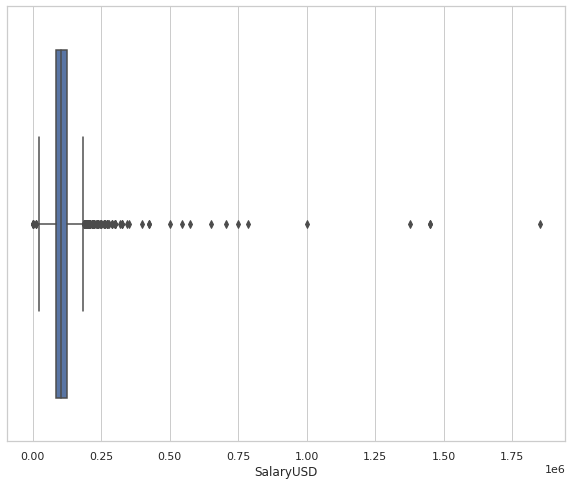

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data_processed["SalaryUSD"])

outliers will be dropped (11 rows)

In [47]:
data_processed[data_processed['SalaryUSD'] > 500000].value_counts().sum()

11

#### thew boxplot without outliers

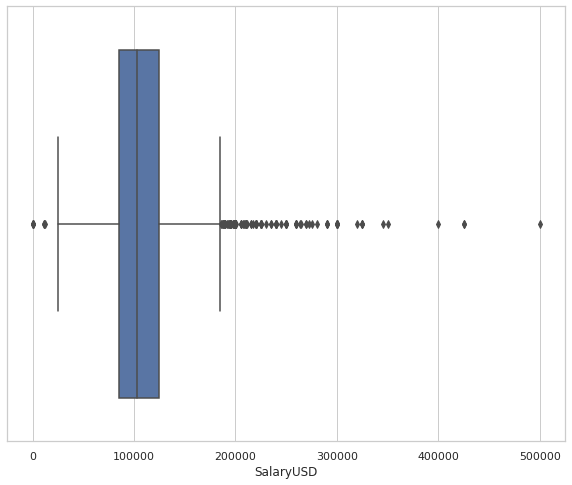

In [48]:
data_processed.drop(data_processed[data_processed['SalaryUSD'] > 500000].index,inplace = True)
data_processed[data_processed['SalaryUSD'] > 500000].value_counts().sum()
plt.figure(figsize = (10,8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data_processed["SalaryUSD"])

#### view  the 'HowManyCompanies' column to answer the question:
####  - Is it better work for one company or several?

In [49]:
data_processed.HowManyCompanies.value_counts()

Not Asked                                                             3660
1 (this is the only company where I've had this kind of position)      513
2 (I worked at another similar position elsewhere before this one)     471
3                                                                      272
4                                                                      110
6 or more                                                               93
5                                                                       76
Name: HowManyCompanies, dtype: int64

#### as weave different values, with text. a standardization pre-processing must be don

In [50]:
data_processed['HowManyCompanies'].loc[data_processed['HowManyCompanies'].astype(str).str.contains('1 ') ]= 1
data_processed['HowManyCompanies'].loc[data_processed['HowManyCompanies'].astype(str).str.contains('2 ') ]= 2


data_processed.HowManyCompanies.value_counts()

/home/apprenant/anaconda3/envs/pythonProject/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Not Asked    3660
1             513
2             471
3             272
4             110
6 or more      93
5              76
Name: HowManyCompanies, dtype: int64

In [51]:
data_processed.value_counts()

Survey Year  Timestamp                SalaryUSD  Country        PostalCode  PrimaryDatabase       YearsWithThisDatabase  JobTitle             ManageStaff  YearsWithThisTypeOfJob  HowManyCompanies  OtherPeopleOnYourTeam  DatabaseServers  Education             Gender
2017         2017-01-05 05:10:20.451  200000.0   United States  Not Asked   Microsoft SQL Server  10                     DBA                  No           5                       Not Asked         2                      350              Masters               Other     1
2018         2017-12-27 21:02:55.621  85544.0    United States  17406       Microsoft SQL Server  18                     Developer: App code  No           30                      Not Asked         None                   30               Bachelors (4 years)   Male      1
             2017-12-28 14:17:24.231  99000.0    United States  63109       Microsoft SQL Server  5                      Developer: T-SQL     No           5                       Not Asked    

In [52]:
data_processed.YearsWithThisTypeOfJob.value_counts()

1     583
3     555
2     534
5     511
4     435
10    385
6     292
7     243
15    227
8     222
20    207
12    144
9     101
18     92
25     79
17     72
11     66
16     65
13     62
14     55
19     43
0      37
22     36
21     27
30     25
23     17
24     13
28     11
26      8
29      8
32      7
35      6
27      6
38      4
40      3
31      3
37      2
34      2
33      2
36      2
45      1
44      1
39      1
Name: YearsWithThisTypeOfJob, dtype: int64

#### saving the data:

In [53]:
data_processed.to_csv(r'data_processed.csv')